In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [36]:
df_rain = pd.read_csv('weatherAUS.csv')
df_rain

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
df_rain.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [89]:
df_rain.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


# Clear Dataset

In [11]:
import pandas as pd
df_rain = pd.read_csv('weatherAUS.csv')
df_rain.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [4]:
# Заміна числових об'єктів колонок на медіанне значення
def replace_numerical(df):
    for col in df.select_dtypes(['int', 'float']):
        df[col] = df[col].fillna(df[col].median())
    return df

# Заміна об'єктів колонки за допомогою методу "ffill"
def replace_object(df):
    for col in df.select_dtypes('object'):
        df[col] = df[col].fillna(method='ffill')
    return df

In [38]:
#Прибираємо записи, де порожні значення в колонці RainToday
df_rain_copy = df_rain.copy()
df_rain_copy = df_rain_copy.dropna (subset=['RainToday'])

In [45]:
#Заповнюємо порожні значення за допомогою розроблених функцій
df_rain_copy = replace_numerical(df_rain_copy)
df_rain_copy = replace_object(df_rain_copy)

In [44]:
df_rain_copy.shape

(142199, 23)

In [46]:
df_rain_copy.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [37]:
# Display Percentage and count of null values in each col

data_types = pd.DataFrame(df_rain.dtypes, columns=['Data types'])
Null_count = pd.DataFrame(df_rain.isnull().sum(), columns=['Null count'])                                                    
Null_Percentage = pd.DataFrame(df_rain.isnull().sum()/df_rain.shape[0]*100, columns=['Null Percentage'])

view_null = pd.concat([data_types, Null_count, Null_Percentage], axis='columns')
view_null

,Data types,Null count,Null Percentage
Date,object,0,0.000000
Location,object,0,0.000000
MinTemp,float64,1485,1.020899
MaxTemp,float64,1261,0.866905
Rainfall,float64,3261,2.241853
Evaporation,float64,62790,43.166506
Sunshine,float64,69835,48.009762
WindGustDir,object,10326,7.098859
WindGustSpeed,float64,10263,7.055548
WindDir9am,object,10566,7.263853


In [47]:
#mapping categorical values to numerical values
df_rain_copy['RainTomorrow']=df_rain_copy['RainTomorrow'].map({'Yes':1,'No':0})

In [48]:
df_rain_copy['RainToday']=df_rain_copy['RainToday'].map({'Yes':1,'No':0})

In [8]:
df_rain_copy['Date']=pd.to_datetime(df_rain_copy['Date'])
df_rain_copy['day']=df_rain_copy['Date'].dt.day
df_rain_copy['month']=df_rain_copy['Date'].dt.month

In [9]:
df_rain_copy['year']=df_rain_copy['Date'].dt.year

In [125]:
df_rain_copy.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,...,1007.1,8.0,5.0,16.9,21.8,0,0,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,...,1007.8,5.0,5.0,17.2,24.3,0,0,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,...,1008.7,5.0,2.0,21.0,23.2,0,0,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,...,1012.8,5.0,5.0,18.1,26.5,0,0,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,0,0,5,12,2008


# Data analyzing

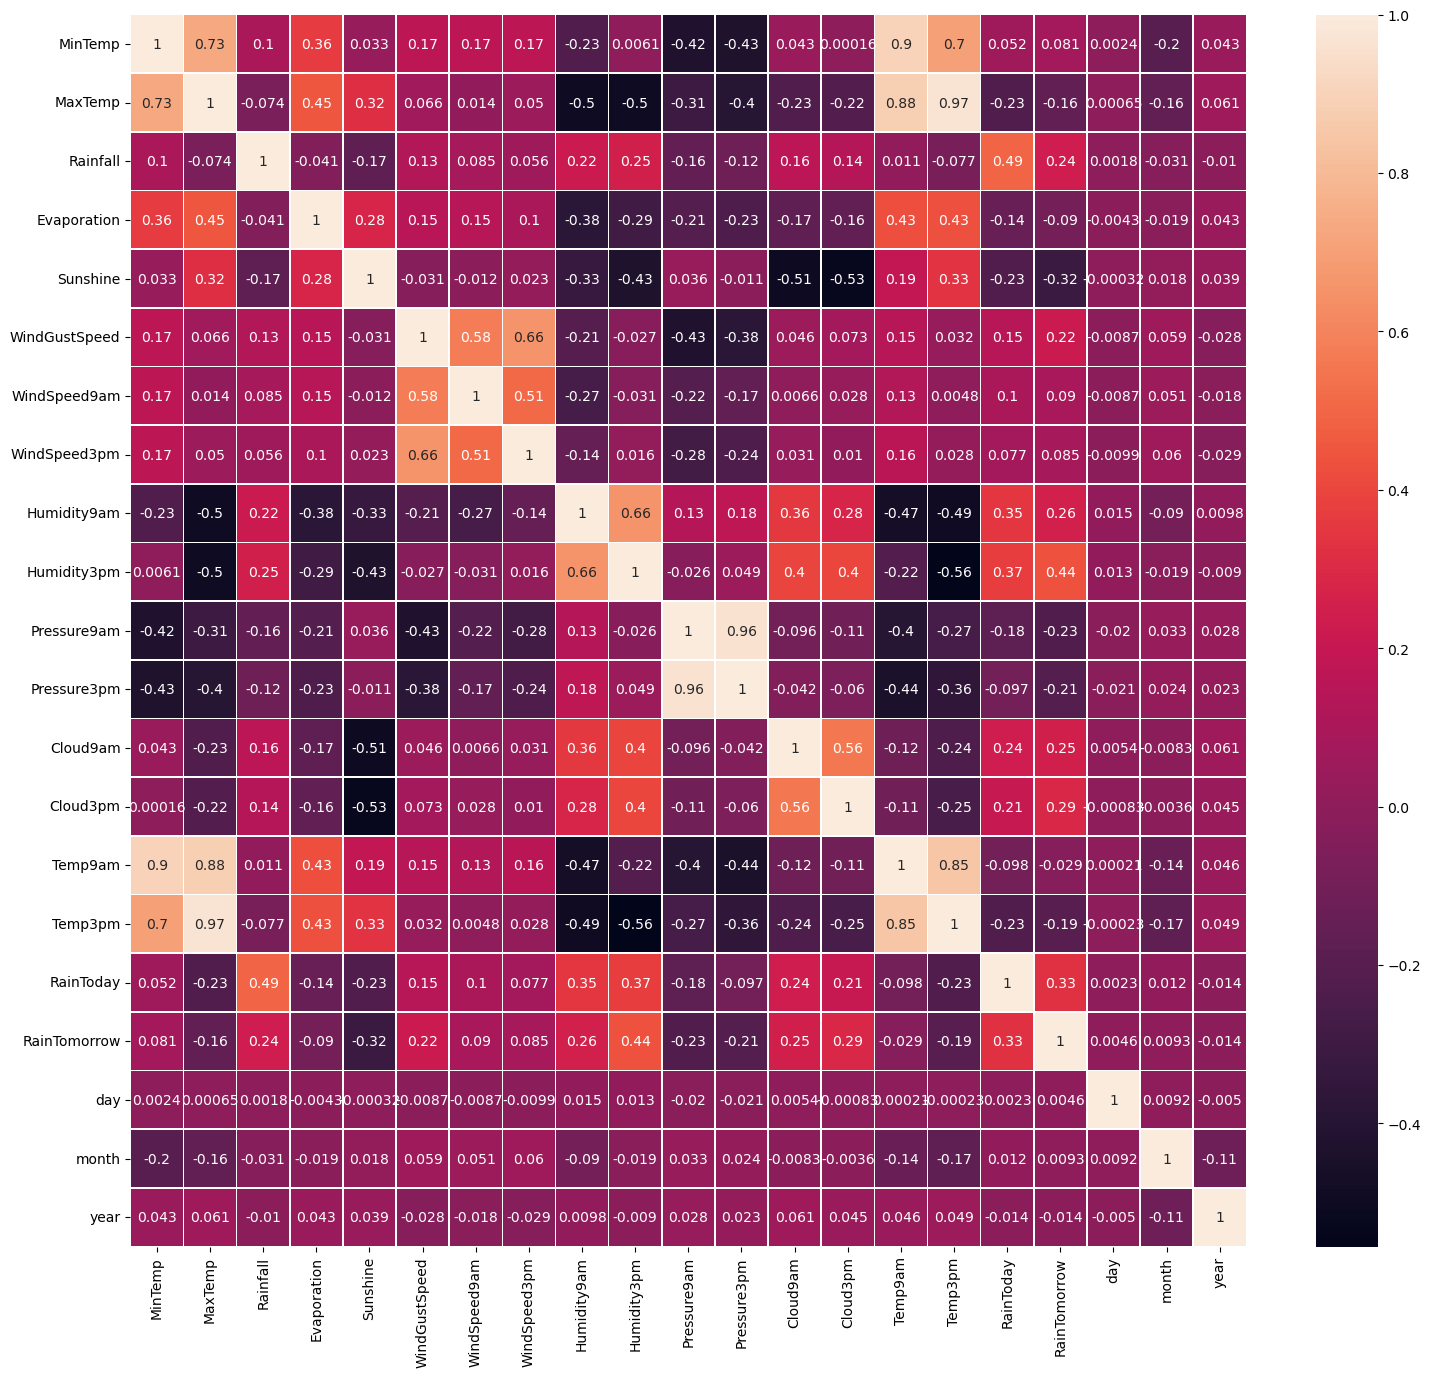

In [20]:
#correlation heatmap
plt.figure(figsize=(18,16))
sns_plot = sns.heatmap(df_rain_copy.corr(),annot=True,linewidth=.5)
sns_plot.figure.savefig(r"C:\Users\helen\OneDrive\Рабочий стол\диплом мн\heatmap.png")

In [49]:
df_rain['RainTomorrow']=df_rain['RainTomorrow'].map({'Yes':1,'No':0})
df_rain['RainToday']=df_rain['RainToday'].map({'Yes':1,'No':0})
df_rain = df_rain.dropna(subset=['RainToday'])

In [32]:
df_rain['RainToday'] = df_rain['RainToday'].fillna(0)

In [33]:
df_rain

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0.0,0.0
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0.0,0.0
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0.0,0.0
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0.0,0.0


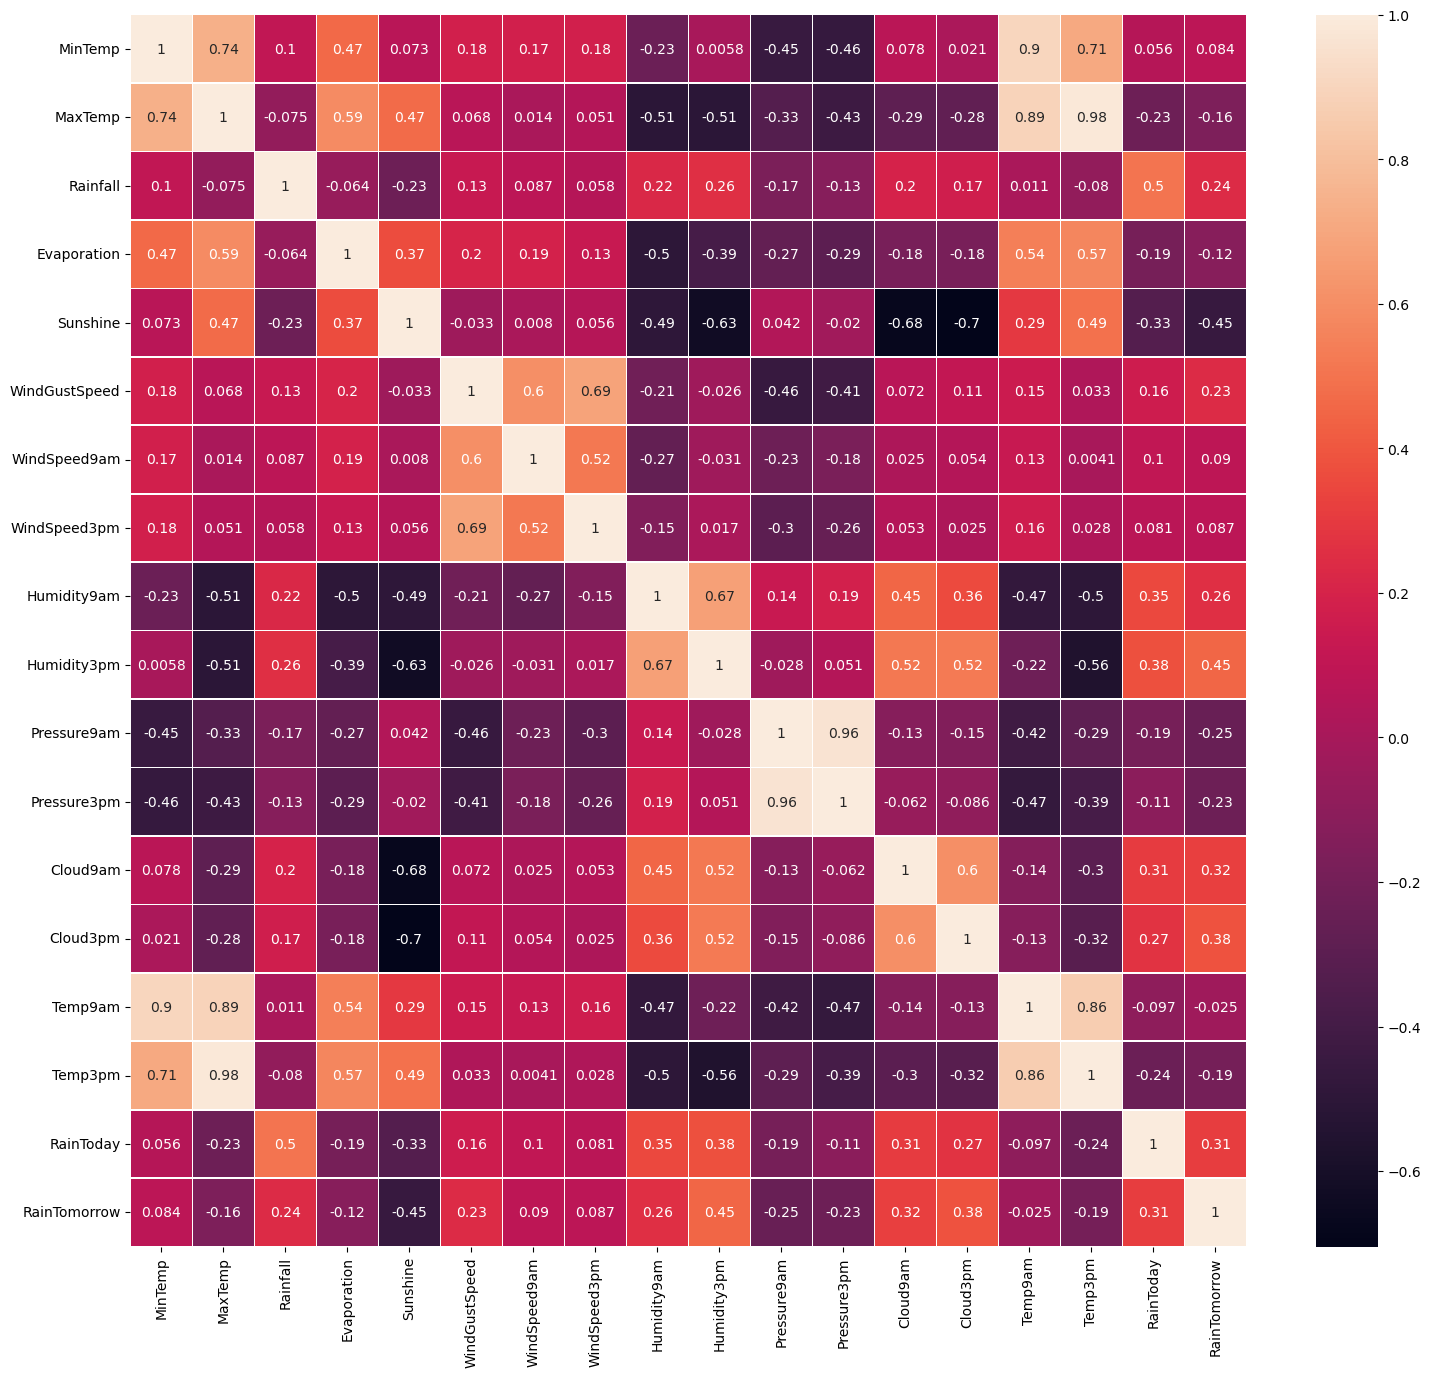

In [50]:
#correlation heatmap

plt.figure(figsize=(18,16))
sns_plot = sns.heatmap(df_rain[[]].corr(),annot=True,linewidth=.5)
sns_plot.figure.savefig(r"C:\Users\helen\OneDrive\Рабочий стол\диплом мн\heatmap.png")

In [309]:
df_raintoday = df_rain_copy[["RainTomorrow", "Date"]].groupby(by=["RainTomorrow"]).count()
df_raintoday = df_raintoday.reset_index()
df_raintoday.columns = ['RainTomorrow', 'Count']
df_raintoday['RainTomorrow']=df_raintoday['RainTomorrow'].map({1:'Yes',0:'No'})
df_raintoday

,RainTomorrow,Count
0,No,110589
1,Yes,31610


Text(0.5, 1.0, 'Rain Tomorrow')

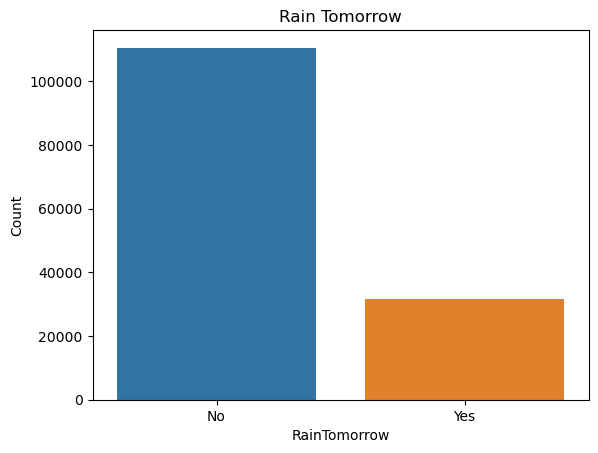

In [310]:
sns.barplot(data=df_raintoday, x="RainTomorrow", y="Count").set_title('Rain Tomorrow')


# Розподіл даних 

In [64]:
df_rain_copy.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [65]:
df_graphics = df_rain_copy[['Rainfall', 'Humidity9am', 'Pressure9am', 'Temp9am']]

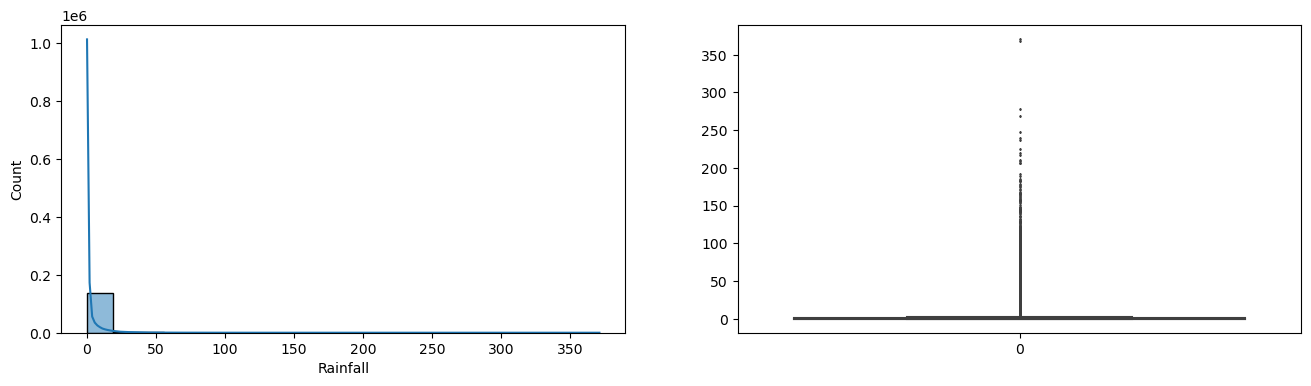

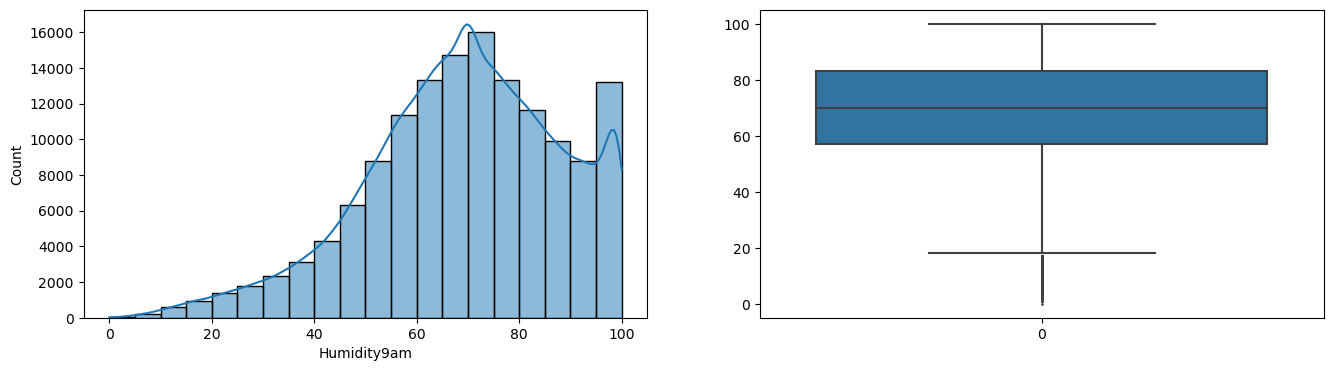

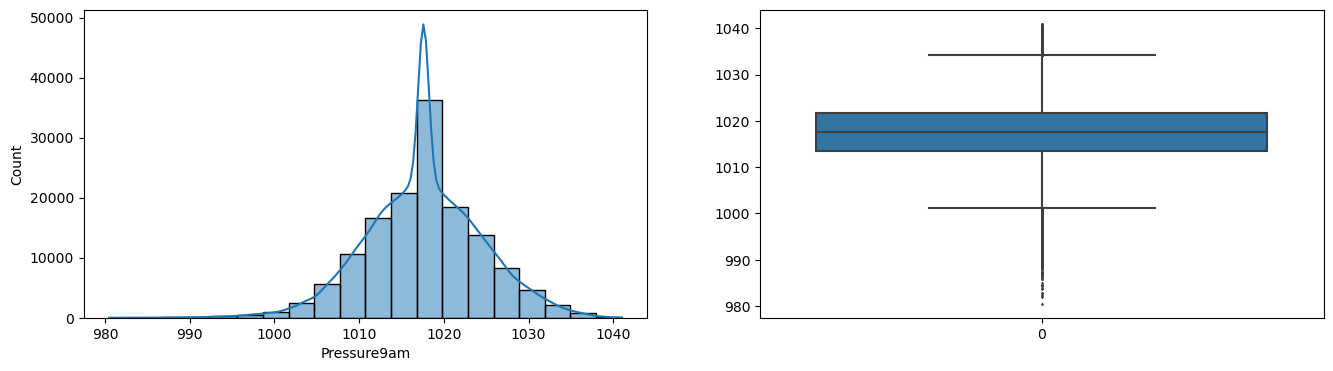

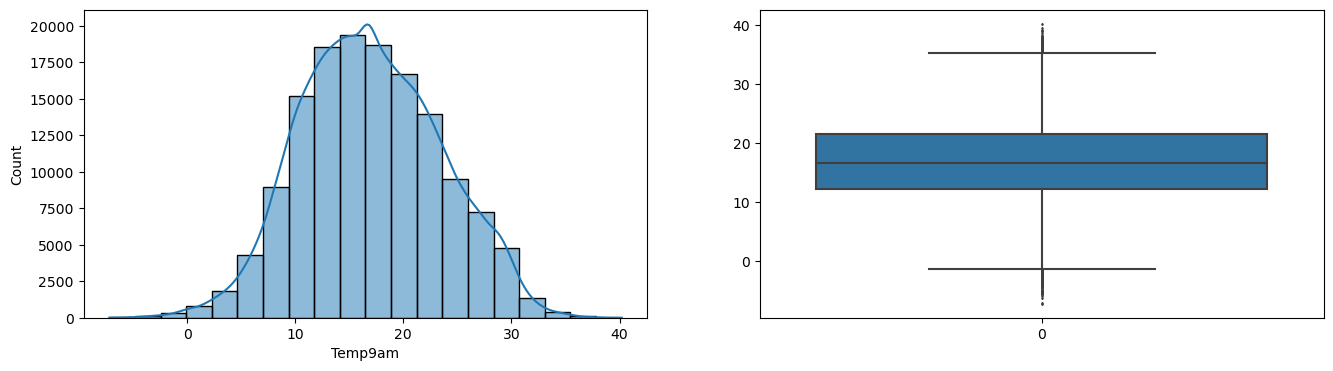

In [68]:
for col in df_graphics:
    fig, ax = plt.subplots(1,2, figsize=(16, 4))

    sns.histplot(df_rain_copy[col], bins=20, kde=True, ax=ax[0])
    
    sns.boxplot(df_rain_copy[col], fliersize=1, ax=ax[1])

# Triangle function

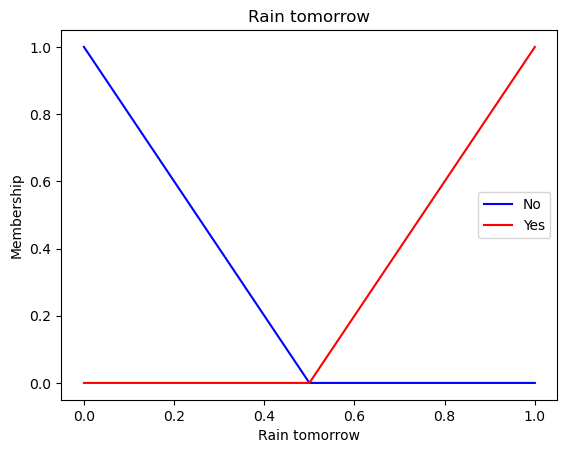

In [308]:

'''
rain_today = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'RainToday')
   
rain_today['no'] = fuzz.trimf(rain_today.universe, [0, 0, 0.5])
rain_today['yes'] = fuzz.trimf(rain_today.universe, [0.5, 1, 1])

rain_today.view()
'''
rain_today = np.arange(0, 1.1, 0.1)
rain_today_no= fuzz.trimf(rain_today, [0, 0, 0.5])
rain_today_yes = fuzz.trimf(rain_today, [0.5, 1, 1])

fig, ax = plt.subplots()

ax.plot(rain_today, rain_today_no, 'b', linewidth=1.5, label='No')
ax.plot(rain_today, rain_today_yes, 'r', linewidth=1.5, label='Yes')
ax.set_xlabel('Rain tomorrow')
ax.set_ylabel('Membership')
ax.set_title('Rain tomorrow')
ax.legend()

plt.show()

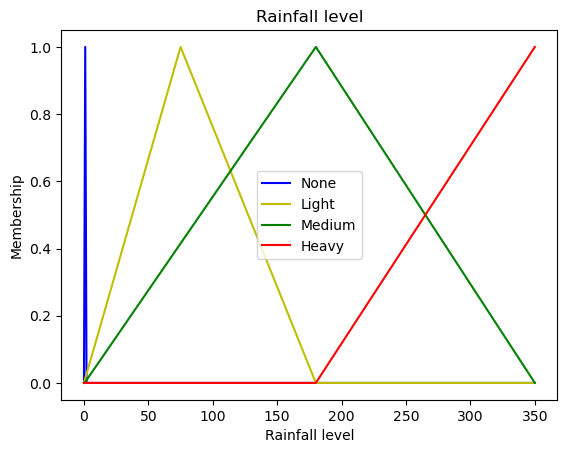

In [108]:
'''rainfall_level = ctrl.Consequent(np.arange(0, 351, 1), 'Rainfall')
   
rainfall_level['none'] = fuzz.trimf(rainfall_level.universe, [0, 0.5, 10])
rainfall_level['light'] = fuzz.trimf(rainfall_level.universe, [0, 75, 180])
rainfall_level['medium'] = fuzz.trimf(rainfall_level.universe, [10, 180, 350])
rainfall_level['heavy'] = fuzz.trimf(rainfall_level.universe, [180, 350, 350])

rainfall_level.view()'''

rainfall_level = np.arange(0, 351, 1)
rainfall_level_none = fuzz.trimf(rainfall_level, [0, 1, 1])
rainfall_level_light = fuzz.trimf(rainfall_level, [0, 75, 180])
rainfall_level_medium = fuzz.trimf(rainfall_level, [0.5, 180, 350])
rainfall_level_heavy = fuzz.trimf(rainfall_level, [180, 350, 350])
fig, ax = plt.subplots()
ax.plot(rainfall_level, rainfall_level_none, 'b', linewidth=1.5, label='None')
ax.plot(rainfall_level, rainfall_level_light, 'y', linewidth=1.5, label='Light')
ax.plot(rainfall_level, rainfall_level_medium, 'g', linewidth=1.5, label='Medium')
ax.plot(rainfall_level, rainfall_level_heavy, 'r', linewidth=1.5, label='Heavy')
ax.set_xlabel('Rainfall level')
ax.set_ylabel('Membership')
ax.set_title('Rainfall level')
ax.legend()

plt.show()

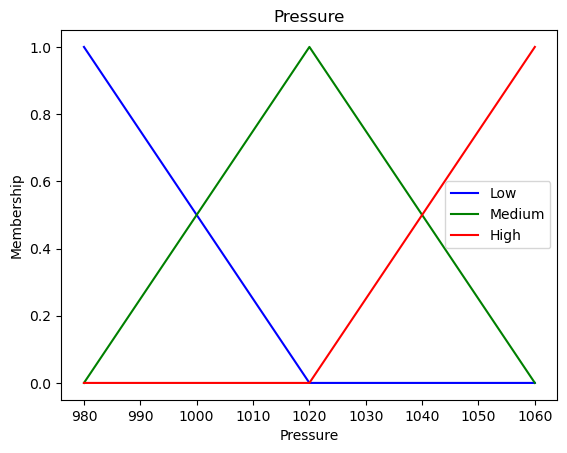

In [118]:
'''pressure = ctrl.Consequent(np.arange(980, 1061, 1), 'Pressure9am')
   
pressure['low'] = fuzz.trimf(pressure.universe, [980, 980, 1020])
pressure['medium'] = fuzz.trimf(pressure.universe, [980, 1020, 1060])
pressure['high'] = fuzz.trimf(pressure.universe, [1020, 1060, 1060])

pressure.view()
'''
pressure = np.arange(980, 1061, 1)
pressure_low = fuzz.trimf(pressure, [980, 980, 1020])
pressure_medium = fuzz.trimf(pressure, [980, 1020, 1060])
pressure_high = fuzz.trimf(pressure, [1020, 1060, 1060])
fig, ax = plt.subplots()
ax.plot(pressure, pressure_low, 'b', linewidth=1.5, label='Low')
ax.plot(pressure, pressure_medium, 'g', linewidth=1.5, label='Medium')
ax.plot(pressure, pressure_high, 'r', linewidth=1.5, label='High')
ax.set_xlabel('Pressure')
ax.set_ylabel('Membership')
ax.set_title('Pressure')
ax.legend()

plt.show()

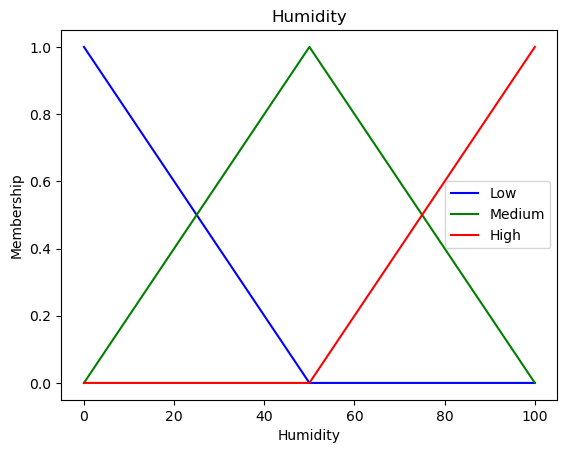

In [97]:
'''humidity = ctrl.Consequent(np.arange(0, 101, 1), 'Humidity9am')
   
humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 50])
humidity['medium'] = fuzz.trimf(humidity.universe, [0, 50, 100])
humidity['high'] = fuzz.trimf(humidity.universe, [50, 100, 100])

humidity.view()'''

humidity = np.arange(0, 101, 1)
humidity_low = fuzz.trimf(humidity, [0, 0, 50])
humidity_medium = fuzz.trimf(humidity, [0, 50, 100])
humidity_high = fuzz.trimf(humidity, [50, 100, 100])
fig, ax = plt.subplots()
ax.plot(humidity, humidity_low, 'b', linewidth=1.5, label='Low')
ax.plot(humidity, humidity_medium, 'g', linewidth=1.5, label='Medium')
ax.plot(humidity, humidity_high, 'r', linewidth=1.5, label='High')
ax.set_xlabel('Humidity')
ax.set_ylabel('Membership')
ax.set_title('Humidity')
ax.legend()

plt.show()

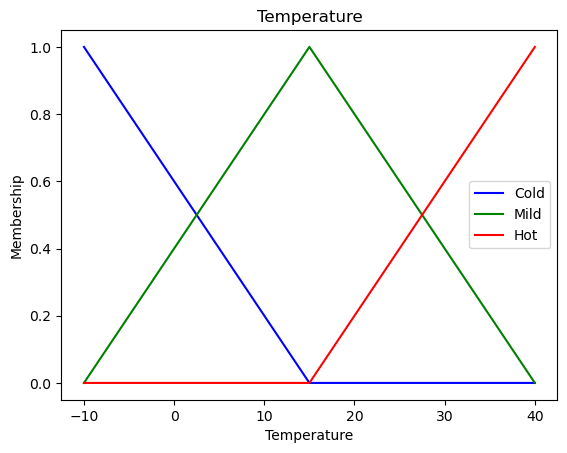

In [95]:
'''temp = ctrl.Consequent(np.arange(-10, 41, 1), 'Temp9am')
    
temp['cold'] = fuzz.trimf(temp.universe, [-10, -10, 15])
temp['mild'] = fuzz.trimf(temp.universe, [-10, 15, 40])
temp['hot'] = fuzz.trimf(temp.universe, [15, 40, 40])

temp.view()
'''
temp = np.arange(-10, 41, 1)
temp_cold = fuzz.trimf(temp, [-10, -10, 15])
temp_mild = fuzz.trimf(temp, [-10, 15, 40])
temp_hot = fuzz.trimf(temp, [15, 40, 40])
fig, ax = plt.subplots()
ax.plot(temp, temp_cold, 'b', linewidth=1.5, label='Cold')
ax.plot(temp, temp_mild, 'g', linewidth=1.5, label='Mild')
ax.plot(temp, temp_hot, 'r', linewidth=1.5, label='Hot')
ax.set_xlabel('Temperature')
ax.set_ylabel('Membership')
ax.set_title('Temperature')
ax.legend()

plt.show()

# Trapezoid function

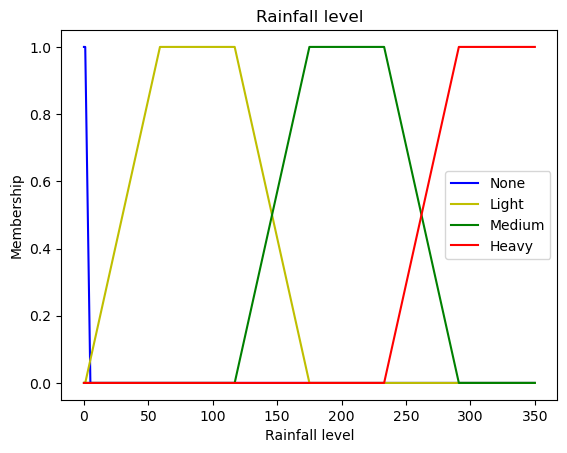

In [121]:
'''rainfall_level = ctrl.Consequent(np.arange(0, 351, 1), 'Rainfall')
   
rainfall_level['none'] = fuzz.trapmf(rainfall_level.universe, [0, 0, 1, 10])
rainfall_level['light'] = fuzz.trapmf(rainfall_level.universe, [1, 59, 117, 175])
rainfall_level['medium'] = fuzz.trapmf(rainfall_level.universe, [117, 175, 233, 291])
rainfall_level['heavy'] = fuzz.trapmf(rainfall_level.universe, [233, 291, 350, 350])

rainfall_level.view()
'''

rainfall_level = np.arange(0, 351, 1)
rainfall_level_none = fuzz.trapmf(rainfall_level, [0, 0, 1, 5])
rainfall_level_light = fuzz.trapmf(rainfall_level, [1, 59, 117, 175])
rainfall_level_medium = fuzz.trapmf(rainfall_level, [117, 175, 233, 291])
rainfall_level_heavy = fuzz.trapmf(rainfall_level, [233, 291, 350, 350])
fig, ax = plt.subplots()
ax.plot(rainfall_level, rainfall_level_none, 'b', linewidth=1.5, label='None')
ax.plot(rainfall_level, rainfall_level_light, 'y', linewidth=1.5, label='Light')
ax.plot(rainfall_level, rainfall_level_medium, 'g', linewidth=1.5, label='Medium')
ax.plot(rainfall_level, rainfall_level_heavy, 'r', linewidth=1.5, label='Heavy')
ax.set_xlabel('Rainfall level')
ax.set_ylabel('Membership')
ax.set_title('Rainfall level')
ax.legend()

plt.show()

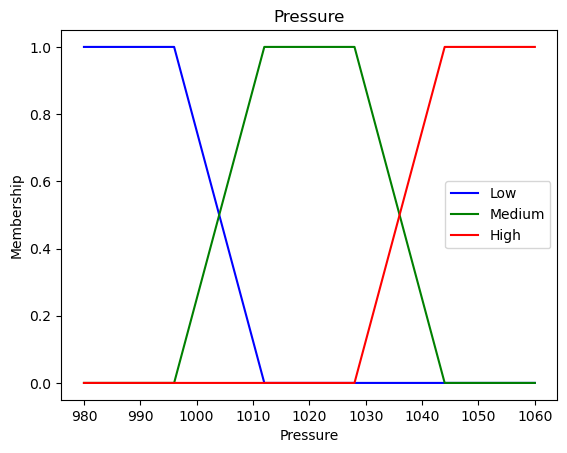

In [117]:
'''
pressure = ctrl.Consequent(np.arange(980, 1061, 1), 'Pressure9am')
   
pressure['low'] = fuzz.trapmf(pressure.universe, [980, 980, 996, 1012])
pressure['medium'] = fuzz.trapmf(pressure.universe, [996, 1012, 1028, 1044])
pressure['high'] = fuzz.trapmf(pressure.universe, [1028, 1044, 1060, 1060])

pressure.view()
'''
pressure = np.arange(980, 1061, 1)
pressure_low = fuzz.trapmf(pressure, [980, 980, 996, 1012])
pressure_medium = fuzz.trapmf(pressure, [996, 1012, 1028, 1044])
pressure_high = fuzz.trapmf(pressure, [1028, 1044, 1060, 1060])
fig, ax = plt.subplots()
ax.plot(pressure, pressure_low, 'b', linewidth=1.5, label='Low')
ax.plot(pressure, pressure_medium, 'g', linewidth=1.5, label='Medium')
ax.plot(pressure, pressure_high, 'r', linewidth=1.5, label='High')
ax.set_xlabel('Pressure')
ax.set_ylabel('Membership')
ax.set_title('Pressure')
ax.legend()

plt.show()

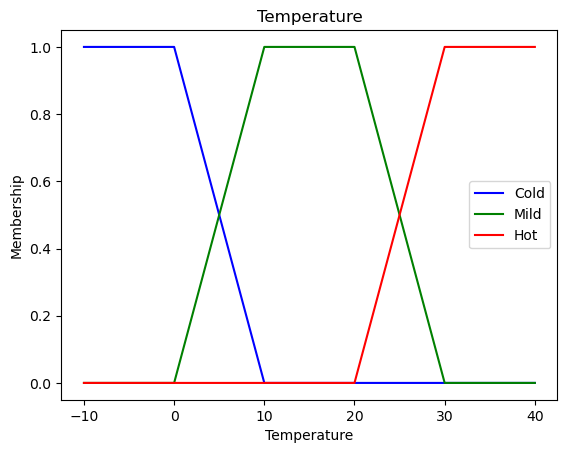

In [122]:
'''temp = ctrl.Consequent(np.arange(-10, 41, 1), 'Temp9am')
    
temp['cold'] = fuzz.trimf(temp.universe, [-10, -10, 15])
temp['mild'] = fuzz.trimf(temp.universe, [-10, 15, 40])
temp['hot'] = fuzz.trimf(temp.universe, [15, 40, 40])

temp.view()
'''
temp = np.arange(-10, 41, 1)
temp_cold = fuzz.trapmf(temp, [-10, -10, 0, 10])
temp_mild = fuzz.trapmf(temp, [0, 10, 20, 30])
temp_hot = fuzz.trapmf(temp, [20, 30, 40, 40])
fig, ax = plt.subplots()
ax.plot(temp, temp_cold, 'b', linewidth=1.5, label='Cold')
ax.plot(temp, temp_mild, 'g', linewidth=1.5, label='Mild')
ax.plot(temp, temp_hot, 'r', linewidth=1.5, label='Hot')
ax.set_xlabel('Temperature')
ax.set_ylabel('Membership')
ax.set_title('Temperature')
ax.legend()

plt.show()

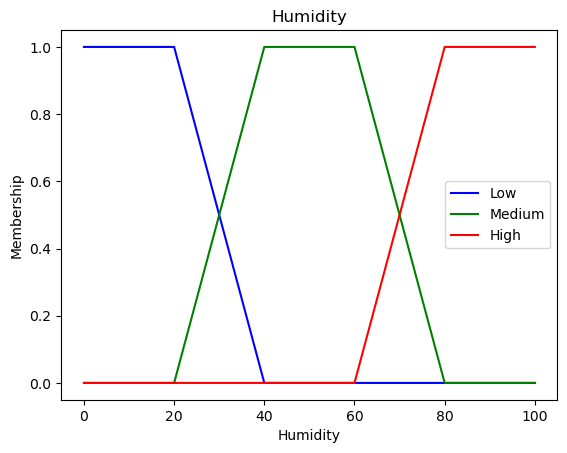

In [123]:
'''humidity = ctrl.Consequent(np.arange(0, 101, 1), 'Humidity9am')
   
humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 50])
humidity['medium'] = fuzz.trimf(humidity.universe, [0, 50, 100])
humidity['high'] = fuzz.trimf(humidity.universe, [50, 100, 100])

humidity.view()'''

humidity = np.arange(0, 101, 1)
humidity_low = fuzz.trapmf(humidity, [0, 0, 20, 40])
humidity_medium = fuzz.trapmf(humidity, [20, 40, 60, 80])
humidity_high = fuzz.trapmf(humidity, [60, 80, 100, 100])
fig, ax = plt.subplots()
ax.plot(humidity, humidity_low, 'b', linewidth=1.5, label='Low')
ax.plot(humidity, humidity_medium, 'g', linewidth=1.5, label='Medium')
ax.plot(humidity, humidity_high, 'r', linewidth=1.5, label='High')
ax.set_xlabel('Humidity')
ax.set_ylabel('Membership')
ax.set_title('Humidity')
ax.legend()

plt.show()

# Gaussian function

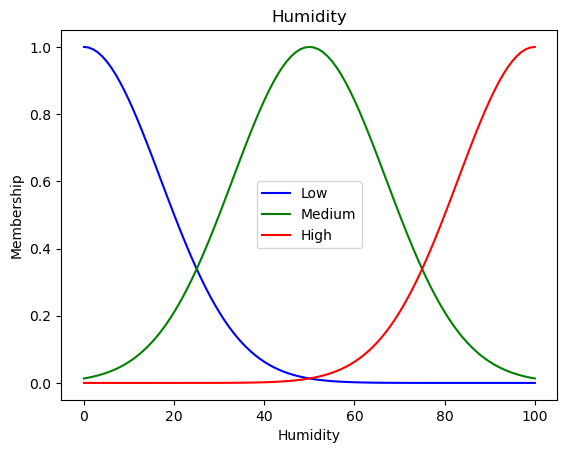

In [185]:
'''humidity = ctrl.Consequent(np.arange(0, 101, 0.1), 'Humidity9am')
   
humidity['low'] = fuzz.gaussmf(humidity.universe, 5, 17)
humidity['medium'] = fuzz.gaussmf(humidity.universe, 50, 17)
humidity['high'] = fuzz.gaussmf(humidity.universe, 95, 17)

humidity.view()'''

humidity = np.arange(0, 101, 1)
humidity_low = fuzz.gaussmf(humidity, 0, 17)
humidity_medium = fuzz.gaussmf(humidity, 50, 17)
humidity_high = fuzz.gaussmf(humidity, 100, 17)
fig, ax = plt.subplots()
ax.plot(humidity, humidity_low, 'b', linewidth=1.5, label='Low')
ax.plot(humidity, humidity_medium, 'g', linewidth=1.5, label='Medium')
ax.plot(humidity, humidity_high, 'r', linewidth=1.5, label='High')
ax.set_xlabel('Humidity')
ax.set_ylabel('Membership')
ax.set_title('Humidity')
ax.legend()

plt.show()

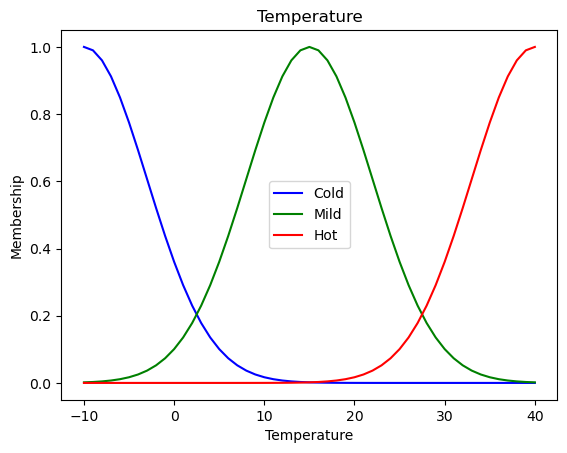

In [184]:
'''
temp = ctrl.Consequent(np.arange(-10, 41, 1), 'Temp9am')
    
temp['cold'] = fuzz.gaussmf(temp.universe, -5, 7)
temp['mild'] = fuzz.gaussmf(temp.universe, 15, 7)
temp['hot'] = fuzz.gaussmf(temp.universe, 35, 7)

temp.view()
'''
temp = np.arange(-10, 41, 1)
temp_cold = fuzz.gaussmf(temp, -10, 7)
temp_mild = fuzz.gaussmf(temp, 15, 7)
temp_hot = fuzz.gaussmf(temp, 40, 7)
fig, ax = plt.subplots()
ax.plot(temp, temp_cold, 'b', linewidth=1.5, label='Cold')
ax.plot(temp, temp_mild, 'g', linewidth=1.5, label='Mild')
ax.plot(temp, temp_hot, 'r', linewidth=1.5, label='Hot')
ax.set_xlabel('Temperature')
ax.set_ylabel('Membership')
ax.set_title('Temperature')
ax.legend()

plt.show()


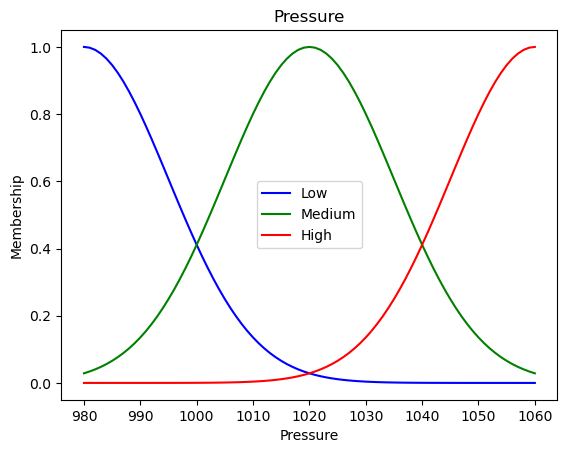

In [183]:
'''
pressure = ctrl.Consequent(np.arange(980, 1061, 1), 'Pressure9am')
   
pressure['low'] = fuzz.gaussmf(pressure.universe, 985, 15)
pressure['medium'] = fuzz.gaussmf(pressure.universe, 1020, 15)
pressure['high'] = fuzz.gaussmf(pressure.universe, 1055, 15)

pressure.view()
'''
pressure = np.arange(980, 1061, 1)
pressure_low = fuzz.gaussmf(pressure, 980, 15)
pressure_medium = fuzz.gaussmf(pressure, 1020, 15)
pressure_high = fuzz.gaussmf(pressure, 1060, 15)
fig, ax = plt.subplots()
ax.plot(pressure, pressure_low, 'b', linewidth=1.5, label='Low')
ax.plot(pressure, pressure_medium, 'g', linewidth=1.5, label='Medium')
ax.plot(pressure, pressure_high, 'r', linewidth=1.5, label='High')
ax.set_xlabel('Pressure')
ax.set_ylabel('Membership')
ax.set_title('Pressure')
ax.legend()

plt.show()


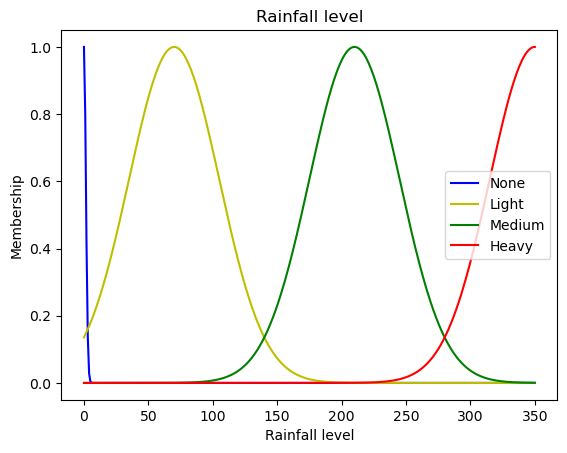

In [182]:
'''
rainfall_level = ctrl.Consequent(np.arange(0, 351, 1), 'Rainfall')
   
rainfall_level['none'] = fuzz.gaussmf(rainfall_level.universe, 0, 1.5)
rainfall_level['light'] = fuzz.gaussmf(rainfall_level.universe, 70, 35)
rainfall_level['medium'] = fuzz.gaussmf(rainfall_level.universe, 210, 35)
rainfall_level['heavy'] = fuzz.gaussmf(rainfall_level.universe, 340, 35)

rainfall_level.view()
'''

rainfall_level = np.arange(0, 351, 1)
rainfall_level_none = fuzz.gaussmf(rainfall_level, 0, 1.5)
rainfall_level_light = fuzz.gaussmf(rainfall_level, 70, 35)
rainfall_level_medium = fuzz.gaussmf(rainfall_level, 210, 35)
rainfall_level_heavy = fuzz.gaussmf(rainfall_level, 350, 35)
fig, ax = plt.subplots()
ax.plot(rainfall_level, rainfall_level_none, 'b', linewidth=1.5, label='None')
ax.plot(rainfall_level, rainfall_level_light, 'y', linewidth=1.5, label='Light')
ax.plot(rainfall_level, rainfall_level_medium, 'g', linewidth=1.5, label='Medium')
ax.plot(rainfall_level, rainfall_level_heavy, 'r', linewidth=1.5, label='Heavy')
ax.set_xlabel('Rainfall level')
ax.set_ylabel('Membership')
ax.set_title('Rainfall level')
ax.legend()

plt.show()


# Bell function

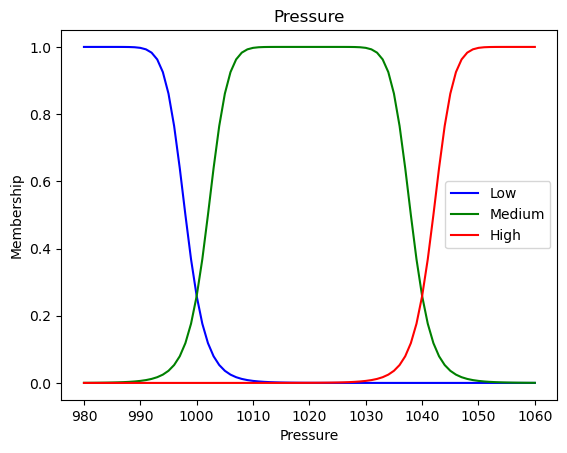

In [279]:
'''
pressure = ctrl.Consequent(np.arange(980, 1061, 1), 'Pressure9am')
   
pressure['low'] = fuzz.gaussmf(pressure.universe, 985, 15)
pressure['medium'] = fuzz.gaussmf(pressure.universe, 1020, 15)
pressure['high'] = fuzz.gaussmf(pressure.universe, 1055, 15)

pressure.view()
'''
pressure = np.arange(980, 1061, 1)
pressure_low = fuzz.gbellmf(pressure, 18, 5, 980)
pressure_medium = fuzz.gbellmf(pressure, 18, 5, 1020)
pressure_high = fuzz.gbellmf(pressure, 18, 5, 1060)
fig, ax = plt.subplots()
ax.plot(pressure, pressure_low, 'b', linewidth=1.5, label='Low')
ax.plot(pressure, pressure_medium, 'g', linewidth=1.5, label='Medium')
ax.plot(pressure, pressure_high, 'r', linewidth=1.5, label='High')
ax.set_xlabel('Pressure')
ax.set_ylabel('Membership')
ax.set_title('Pressure')
ax.legend()

plt.show()

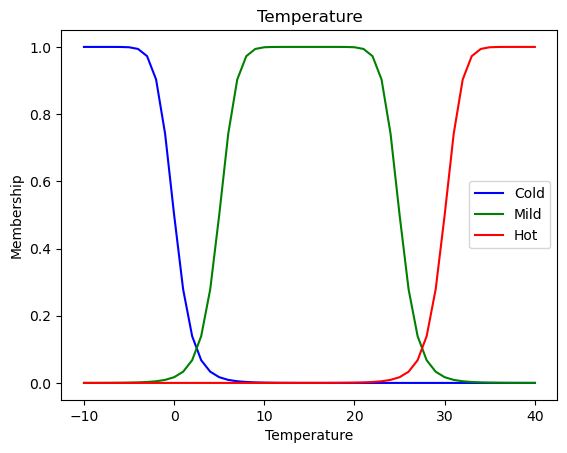

In [278]:
'''
temp = ctrl.Consequent(np.arange(-10, 41, 1), 'Temp9am')
    
temp['cold'] = fuzz.gaussmf(temp.universe, -5, 7)
temp['mild'] = fuzz.gaussmf(temp.universe, 15, 7)
temp['hot'] = fuzz.gaussmf(temp.universe, 35, 7)

temp.view()
'''
temp = np.arange(-10, 41, 1)
temp_cold = fuzz.gbellmf(temp, 10, 5, -10)
temp_mild = fuzz.gbellmf(temp, 10, 5, 15)
temp_hot = fuzz.gbellmf(temp, 10, 5, 40)
fig, ax = plt.subplots()
ax.plot(temp, temp_cold, 'b', linewidth=1.5, label='Cold')
ax.plot(temp, temp_mild, 'g', linewidth=1.5, label='Mild')
ax.plot(temp, temp_hot, 'r', linewidth=1.5, label='Hot')
ax.set_xlabel('Temperature')
ax.set_ylabel('Membership')
ax.set_title('Temperature')
ax.legend()

plt.show()


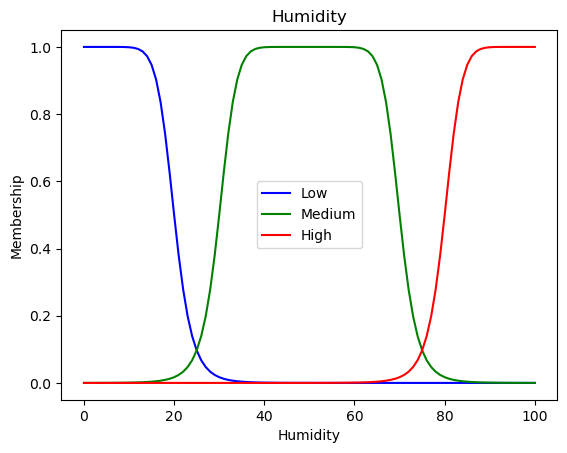

In [277]:
'''humidity = ctrl.Consequent(np.arange(0, 101, 0.1), 'Humidity9am')
   
humidity['low'] = fuzz.gaussmf(humidity.universe, 5, 17)
humidity['medium'] = fuzz.gaussmf(humidity.universe, 50, 17)
humidity['high'] = fuzz.gaussmf(humidity.universe, 95, 17)

humidity.view()'''

humidity = np.arange(0, 101, 1)
humidity_low = fuzz.gbellmf(humidity, 20, 5, 0)
humidity_medium = fuzz.gbellmf(humidity, 20, 5, 50)
humidity_high = fuzz.gbellmf(humidity, 20, 5, 100)
fig, ax = plt.subplots()
ax.plot(humidity, humidity_low, 'b', linewidth=1.5, label='Low')
ax.plot(humidity, humidity_medium, 'g', linewidth=1.5, label='Medium')
ax.plot(humidity, humidity_high, 'r', linewidth=1.5, label='High')
ax.set_xlabel('Humidity')
ax.set_ylabel('Membership')
ax.set_title('Humidity')
ax.legend()

plt.show()

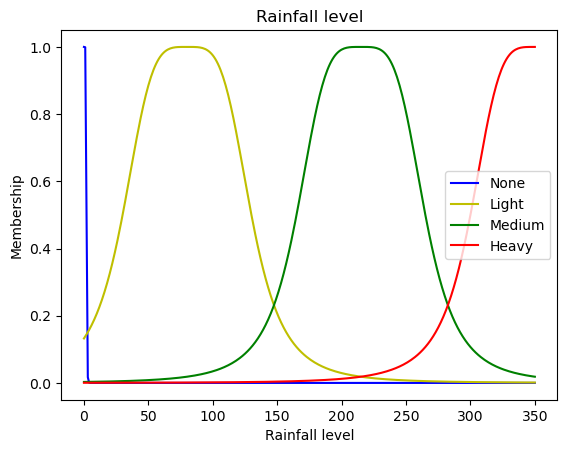

In [262]:
'''
rainfall_level = ctrl.Consequent(np.arange(0, 351, 1), 'Rainfall')
   
rainfall_level['none'] = fuzz.gaussmf(rainfall_level.universe, 0, 1.5)
rainfall_level['light'] = fuzz.gaussmf(rainfall_level.universe, 70, 35)
rainfall_level['medium'] = fuzz.gaussmf(rainfall_level.universe, 210, 35)
rainfall_level['heavy'] = fuzz.gaussmf(rainfall_level.universe, 340, 35)

rainfall_level.view()
'''

rainfall_level = np.arange(0, 351, 1)
rainfall_level_none = fuzz.gbellmf(rainfall_level, 2, 5, 0)
rainfall_level_light = fuzz.gbellmf(rainfall_level, 50, 2, 80)
rainfall_level_medium = fuzz.gbellmf(rainfall_level, 50, 2, 215)
rainfall_level_heavy = fuzz.gbellmf(rainfall_level, 50, 2, 350)
fig, ax = plt.subplots()
ax.plot(rainfall_level, rainfall_level_none, 'b', linewidth=1.5, label='None')
ax.plot(rainfall_level, rainfall_level_light, 'y', linewidth=1.5, label='Light')
ax.plot(rainfall_level, rainfall_level_medium, 'g', linewidth=1.5, label='Medium')
ax.plot(rainfall_level, rainfall_level_heavy, 'r', linewidth=1.5, label='Heavy')
ax.set_xlabel('Rainfall level')
ax.set_ylabel('Membership')
ax.set_title('Rainfall level')
ax.legend()

plt.show()


# Timf & Bell function

In [33]:
df_month = df_rain_copy[["RainTomorrow", "month", "Date"]].groupby(by=["RainTomorrow", "month"]).count()

In [34]:
df_month = df_month.reset_index()
df_month.columns = ['RainTomorrow', 'month', 'Date']

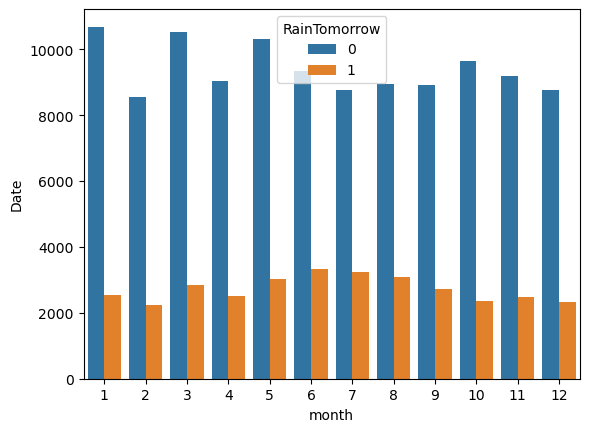

In [36]:
sns.barplot(data=df_month, x="month", y="Date", hue="RainTomorrow")


In [37]:
df_month_rain_yes = df_month.loc[df_month['RainTomorrow'] == 1]

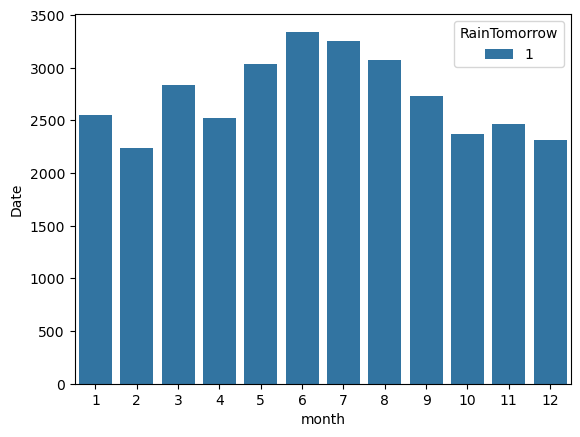

In [40]:
sns.barplot(data=df_month_rain_yes, x="month", y="Date", hue="RainTomorrow")

In [ ]:
df_rainfall = df_rain_copy['MinTemp', 'MaxTemp', 'Rainfall', 'Temp9am', 'Temp3pm']

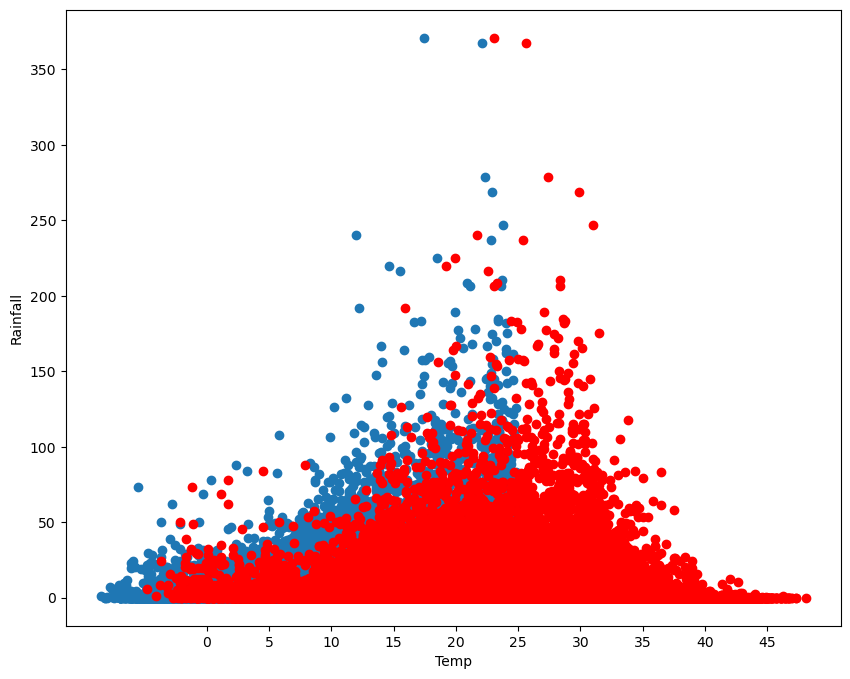

In [45]:
plt.figure(figsize=(10,8))
plt.scatter(df_rain_copy['MinTemp'],df_rain_copy['Rainfall'])
plt.scatter(df_rain_copy['MaxTemp'],df_rain_copy['Rainfall'], color="Red")
plt.xlabel("Temp")
plt.xticks(range(0,50,5))
plt.ylabel("Rainfall")
plt.show()

In [46]:
df_rain_copy[''].head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,...,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0,1,12
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,...,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0,2,12
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,...,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0,3,12
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,...,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0,4,12
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,...,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,5,12


In [106]:
df_rain_copy.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'day', 'month', 'year'],
      dtype='object')

In [131]:
df_test = df_rain_copy[['MinTemp', 'MaxTemp', 'Rainfall', 'Temp9am', 'WindSpeed9am', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'month', 'RainTomorrow', 'RainToday']]

In [58]:
df_test.head()

,MinTemp,MaxTemp,Rainfall,Temp9am,WindSpeed9am,Pressure9am,Cloud9am,month,RainTomorrow
0,13.4,22.9,0.6,16.9,20.0,1007.7,8.0,12,0
1,7.4,25.1,0.0,17.2,4.0,1010.6,5.0,12,0
2,12.9,25.7,0.0,21.0,19.0,1007.6,5.0,12,0
3,9.2,28.0,0.0,18.1,11.0,1017.6,5.0,12,0
4,17.5,32.3,1.0,17.8,7.0,1010.8,7.0,12,0


In [115]:
y_min_temp_no = list(df_test.loc[df_test['RainTomorrow'] == 0]['MinTemp'])
y_max_temp_no = list(df_test.loc[df_test['RainTomorrow'] == 0]['MaxTemp'])
y_temp_no = list(df_test.loc[df_test['RainTomorrow'] == 0]['Temp9am'])
y_min_temp_yes = list(df_test.loc[df_test['RainTomorrow'] == 1]['MinTemp'])
y_max_temp_yes = list(df_test.loc[df_test['RainTomorrow'] == 1]['MaxTemp'])
y_temp_yes = list(df_test.loc[df_test['RainTomorrow'] == 1]['Temp9am'])

In [119]:
x = [i for i in range(0, len(x_min_temp_no))]

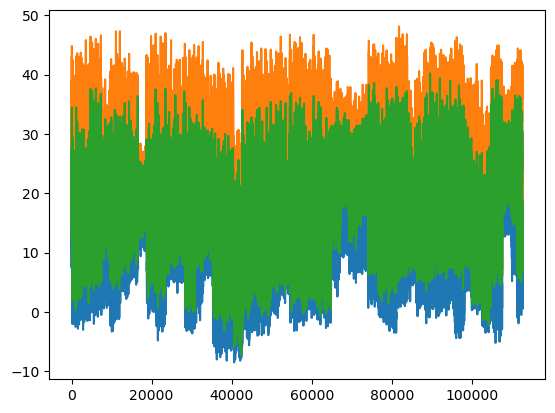

In [120]:
plt.plot(x, y_min_temp_no )
plt.plot(x, y_max_temp_no )
plt.plot(x, y_temp_no)

plt.show()

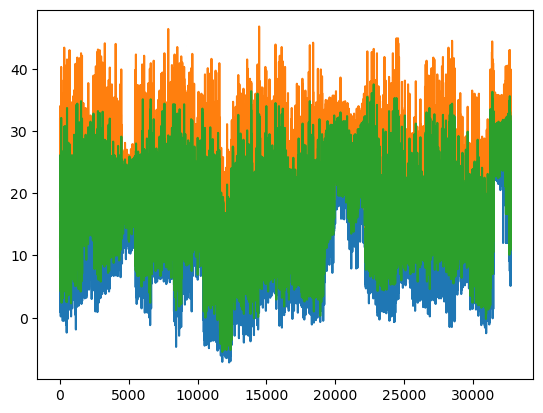

In [121]:
x = [i for i in range(0, len(x_min_temp_yes))]
plt.plot(x, y_min_temp_yes)
plt.plot(x, y_max_temp_yes)
plt.plot(x, y_temp_yes)

plt.show()

In [ ]:
plt.plot(y, x_min_temp_yes )
plt.plot(y, x_max_temp_yes )
plt.plot(y, x_temp_yes)

plt.show()

In [95]:
df_test

,MinTemp,MaxTemp,Rainfall,Temp9am,WindSpeed9am,Pressure9am,Cloud9am,month,RainTomorrow
0,13.4,22.9,0.6,16.9,20.0,1007.7,8.0,12,0
1,7.4,25.1,0.0,17.2,4.0,1010.6,5.0,12,0
2,12.9,25.7,0.0,21.0,19.0,1007.6,5.0,12,0
3,9.2,28.0,0.0,18.1,11.0,1017.6,5.0,12,0
4,17.5,32.3,1.0,17.8,7.0,1010.8,7.0,12,0
...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,10.1,13.0,1024.6,5.0,6,0
145456,3.6,25.3,0.0,10.9,13.0,1023.5,5.0,6,0
145457,5.4,26.9,0.0,12.5,9.0,1021.0,5.0,6,0
145458,7.8,27.0,0.0,15.1,13.0,1019.4,3.0,6,0


In [108]:
y_press3_no = list(df_test.loc[df_test['RainTomorrow'] == 0]['Pressure3pm'])
y_press9_no = list(df_test.loc[df_test['RainTomorrow'] == 0]['Pressure9am'])
y_press3_yes = list(df_test.loc[df_test['RainTomorrow'] == 1]['Pressure3pm'])
y_press9_yes = list(df_test.loc[df_test['RainTomorrow'] == 1]['Pressure9am'])


In [122]:
x1 = [i for i in range(0, len(y_press3_no))]

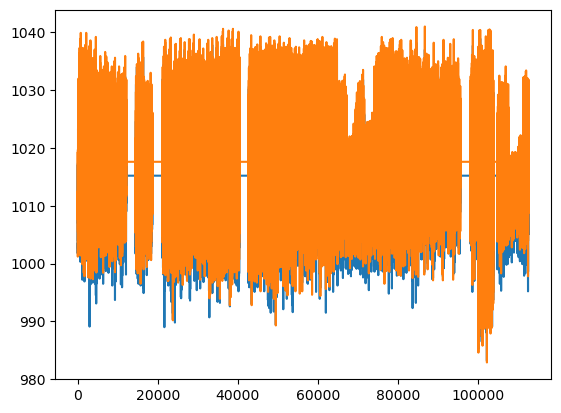

In [124]:
plt.plot(x1, y_press3_no )
plt.plot(x1, y_press9_no )

plt.show()

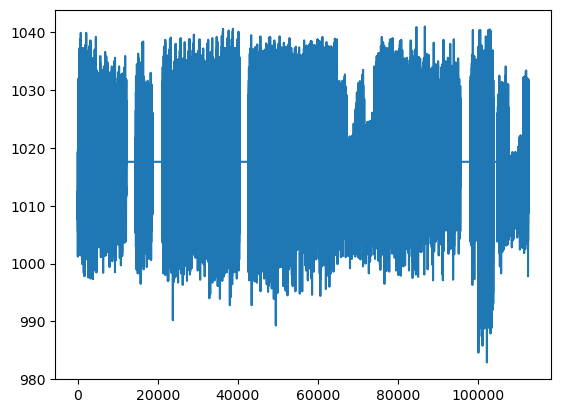

In [113]:
plt.plot(x, y_press9_no )

plt.show()

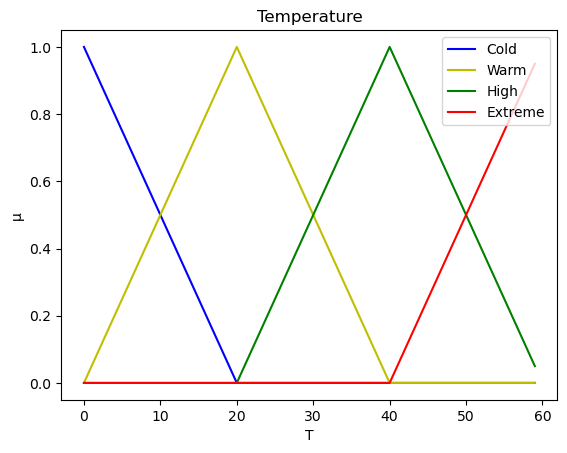

In [306]:
'''temp = ctrl.Consequent(np.arange(-10, 41, 1), 'Temp9am')
    
temp['cold'] = fuzz.trimf(temp.universe, [-10, -10, 15])
temp['mild'] = fuzz.trimf(temp.universe, [-10, 15, 40])
temp['hot'] = fuzz.trimf(temp.universe, [15, 40, 40])

temp.view()
'''
temp = np.arange(0, 60, 1)
temp_cold = fuzz.trimf(temp, [0, 0, 20])
temp_mild = fuzz.trimf(temp, [0, 20, 40])
temp_hot = fuzz.trimf(temp, [20, 40, 60])
temp_ext = fuzz.trimf(temp, [40, 60, 60])

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(temp, temp_cold, 'b', linewidth=1.5, label='Cold')
ax.plot(temp, temp_mild, 'y', linewidth=1.5, label='Warm')
ax.plot(temp, temp_hot, 'g', linewidth=1.5, label='High')
ax.plot(temp, temp_ext, 'r', linewidth=1.5, label='Extreme')

ax.set_xlabel('T')
ax.set_ylabel('µ')
ax.set_title('Temperature')
ax.legend()

plt.show()

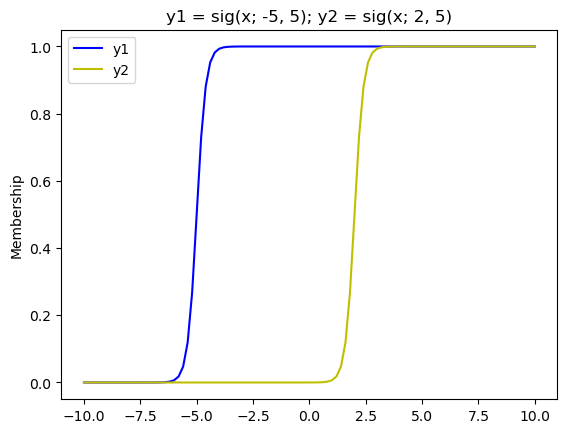

In [346]:
rain_today = np.arange(-10, 10.2, 0.2)
rain_today_no= fuzz.sigmf(rain_today, -5, 5)
rain_today_no1= fuzz.sigmf(rain_today, 2, 5)

fig, ax = plt.subplots()

ax.plot(rain_today, rain_today_no, 'b', linewidth=1.5, label='y1')
ax.plot(rain_today, rain_today_no1, 'y', linewidth=1.5, label='y2')

ax.set_ylabel('Membership')
ax.set_title('y1 = sig(x; -5, 5); y2 = sig(x; 2, 5)')
ax.legend()
plt.show()

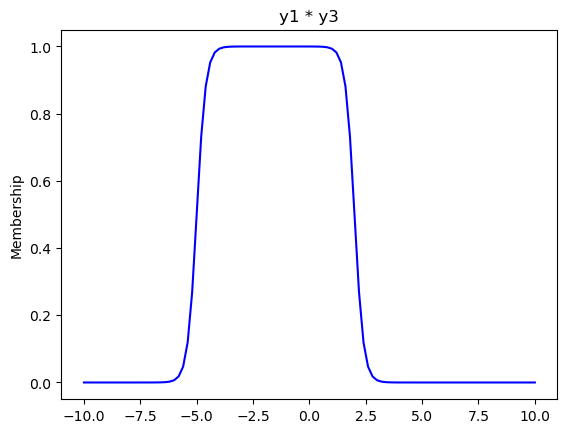

In [343]:
rain_today = np.arange(-10, 10.2, 0.2)
rain_today_no= fuzz.sigmf(rain_today, -5, 5)
rain_today_no1= fuzz.sigmf(rain_today, 2, -5)

fig, ax = plt.subplots()

ax.plot(rain_today, rain_today_no*rain_today_no1, 'b', linewidth=1.5, label='y1')
#ax.plot(rain_today, rain_today_no1, 'r', linewidth=1.5, label='y3')

ax.set_ylabel('Membership')
ax.set_title('y1 * y3')
plt.show()

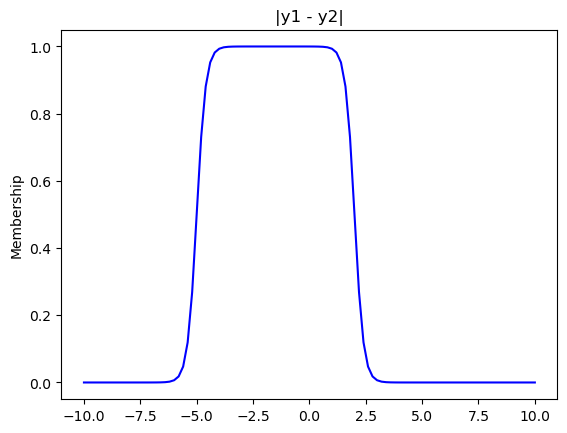

In [344]:
rain_today = np.arange(-10, 10.2, 0.2)
rain_today_no= fuzz.sigmf(rain_today, -5, 5)
rain_today_no1= fuzz.sigmf(rain_today, 2, 5)

fig, ax = plt.subplots()

ax.plot(rain_today, abs(rain_today_no-rain_today_no1), 'b', linewidth=1.5, label='y1')
#ax.plot(rain_today, rain_today_no1, 'r', linewidth=1.5, label='y2')

ax.set_ylabel('Membership')
ax.set_title('|y1 - y2|')
plt.show()

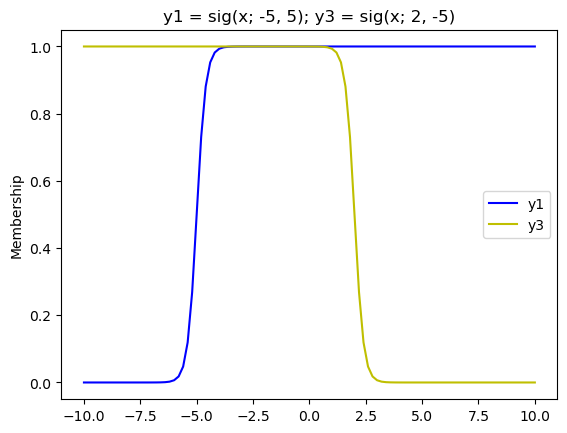

In [347]:
rain_today = np.arange(-10, 10.2, 0.2)
rain_today_no= fuzz.sigmf(rain_today, -5, 5)
rain_today_no1= fuzz.sigmf(rain_today, 2, -5)

fig, ax = plt.subplots()

ax.plot(rain_today, rain_today_no, 'b', linewidth=1.5, label='y1')
ax.plot(rain_today, rain_today_no1, 'y', linewidth=1.5, label='y3')

ax.set_ylabel('Membership')
ax.set_title('y1 = sig(x; -5, 5); y3 = sig(x; 2, -5)')
ax.legend()
plt.show()